In [1]:
import cv2
import math
import time
import random
import numpy             as np
import matplotlib.pyplot as plt
from   scipy.stats       import entropy
from   matplotlib        import rcParams

In [2]:
# Path to images for encrypting
doraemon_image_path      = '../Pictures/doraemon.webp'
tom_and_jerry_image_path = '../Pictures/tom_and_jerry.jpg'
inside_out_image_path    = '../Pictures/inside_out.jpg'
blue_rose_image_path     = '../Pictures/blue_rose.jpg'
boy_image_path           = '../Pictures/boy.jpg'
flowers_image_path       = '../Pictures/flowers.jpg'
idea_image_path          = '../Pictures/idea.png'
jerry_image_path         = '../Pictures/jerry.jpg'
panda_image_path         = '../Pictures/panda.webp'

In [3]:
# Reading the images for further processing
doraemon_image      = cv2.imread(doraemon_image_path)
tom_and_jerry_image = cv2.imread(tom_and_jerry_image_path)
inside_out_image    = cv2.imread(inside_out_image_path)
blue_rose_image     = cv2.imread(blue_rose_image_path)
boy_image           = cv2.imread(boy_image_path)
flowers_image       = cv2.imread(flowers_image_path)
idea_image          = cv2.imread(idea_image_path)
jerry_image         = cv2.imread(jerry_image_path)
panda_image         = cv2.imread(panda_image_path)

In [4]:
# Splitting the different images into red, blue and green images
# cv2 splits the images in order of blue, green and red channels
# while it merges the images in the order of red, green and blue channels
blue_doraemon_image,      green_doraemon_image,      red_doraemon_image      = cv2.split(np.array(doraemon_image))
blue_tom_and_jerry_image, green_tom_and_jerry_image, red_tom_and_jerry_image = cv2.split(np.array(tom_and_jerry_image))
blue_inside_out_image,    green_inside_out_image,    red_inside_out_image    = cv2.split(np.array(inside_out_image))
blue_blue_rose_image,     green_blue_rose_image,     red_blue_rose_image     = cv2.split(np.array(blue_rose_image))
blue_boy_image,           green_boy_image,           red_boy_image           = cv2.split(np.array(boy_image))
blue_flowers_image,       green_flowers_image,       red_flowers_image       = cv2.split(np.array(flowers_image))
blue_idea_image,          green_idea_image,          red_idea_image          = cv2.split(np.array(idea_image))
blue_jerry_image,         green_jerry_image,         red_jerry_image         = cv2.split(np.array(jerry_image))
blue_panda_image,         green_panda_image,         red_panda_image         = cv2.split(np.array(panda_image))

In [5]:
# Getting the dimensions of the differnt images
x_doraemon_image,      y_doraemon_image,      z_doraemon_image      = np.shape(doraemon_image)
x_tom_and_jerry_image, y_tom_and_jerry_image, z_tom_and_jerry_image = np.shape(tom_and_jerry_image)
x_inside_out_image,    y_inside_out_image,    z_inside_out_image    = np.shape(inside_out_image)
x_blue_rose_image,     y_blue_rose_image,     z_blue_rose_image     = np.shape(blue_rose_image)
x_boy_image,           y_boy_image,           z_boy_image           = np.shape(boy_image)
x_flowers_image,       y_flowers_image,       z_flowers_image       = np.shape(flowers_image)
x_idea_image,          y_idea_image,          z_idea_image          = np.shape(idea_image)
x_jerry_image,         y_jerry_image,         z_jerry_image         = np.shape(jerry_image)
x_panda_image,         y_panda_image,         z_panda_image         = np.shape(panda_image)

In [6]:
# Merging the three different channels to get the image
rgb_doraemon_image       = cv2.merge([red_doraemon_image,      green_doraemon_image,      blue_doraemon_image])
rgb_tom_and_jerry_image = cv2.merge([red_tom_and_jerry_image, green_tom_and_jerry_image, blue_tom_and_jerry_image])
rgb_inside_out_image     = cv2.merge([red_inside_out_image,    green_inside_out_image,    blue_inside_out_image])
rgb_blue_rose_image      = cv2.merge([red_blue_rose_image,     green_blue_rose_image,     blue_blue_rose_image])
rgb_boy_image            = cv2.merge([red_boy_image,           green_boy_image,           blue_boy_image])
rgb_flowers_image        = cv2.merge([red_flowers_image,       green_flowers_image,       blue_flowers_image])
rgb_idea_image           = cv2.merge([red_idea_image,          green_idea_image,          blue_idea_image])
rgb_jerry_image          = cv2.merge([red_jerry_image,         green_jerry_image,         blue_jerry_image])
rgb_panda_image          = cv2.merge([red_panda_image,         green_panda_image,         blue_panda_image])

In [7]:
# Function to display images horizontally in IPython Cell
# length             - Length of the figure
# breadth            - Breadth of the figure
# rows               - Number of rows to be there in the plot
# columns            - Number of columns to be there in the plot
# images_list        - List of images to be displayed
# images_titles_list - list of titles to the images to be displayed
def display_images_horizontaly(length, breadth, rows, columns, images_list, images_titles_list): 
    rcParams['figure.figsize'] = length, breadth
    figure, axis = plt.subplots(rows, columns)
    for i in range(rows):
        for j in range(columns):
            one_dimensional_index = rows * i + j
            axis[i][j].set_title(images_titles_list[one_dimensional_index])
            axis[i][j].imshow(images_list[one_dimensional_index])
    return None

In [8]:
# Creating list of all the images and images titles
images_list        = [rgb_doraemon_image, rgb_tom_and_jerry_image, rgb_inside_out_image, rgb_blue_rose_image, rgb_boy_image, 
                      rgb_flowers_image, rgb_idea_image, rgb_jerry_image, rgb_panda_image]
images_titles_list = ["Doraemon Image", "Tom and Jerry Image", "Inside Out Image", "Blue Rose Image", "Boy Image",
                      "Flowers Image", "Idea Image", "Jerry Image", "Panda Image"]

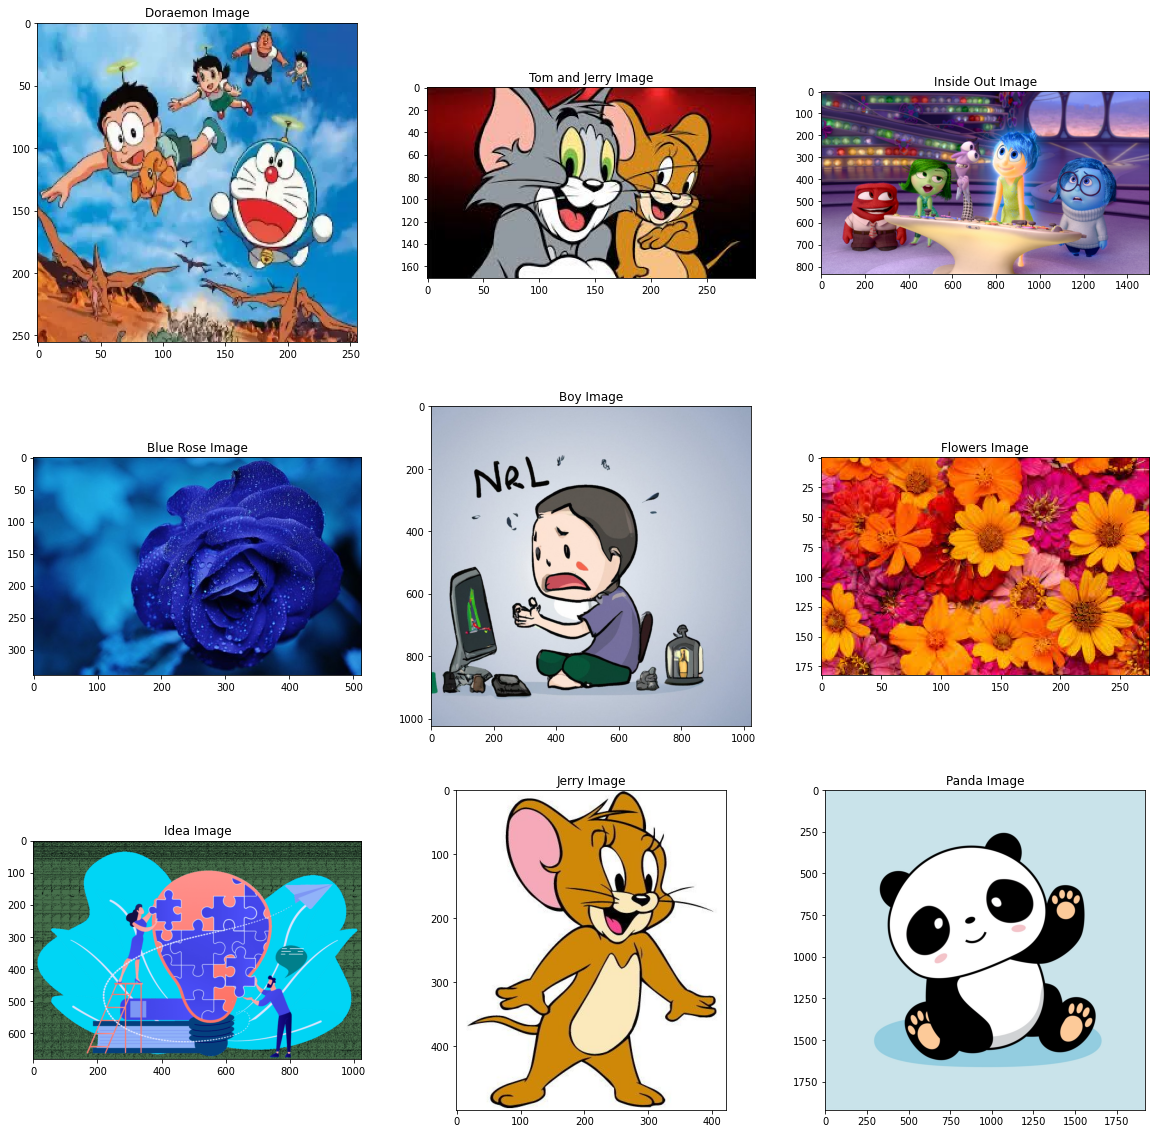

In [10]:
display_images_horizontaly(20, 20, 3, 3, images_list, images_titles_list)

In [11]:
# Constants for getting combined transformation transformation indexes
THETA     = 70
VELOCITY1 = 21
VELOCITY2 = 12
TIME      = 34
FREQUENCY = 15

In [12]:
# Fnction to get combined transformation indexes
# This uses Galilean and Rotational transformation for exchanging pixels in the image
# x     - the x index to be transformed
# y     - the y index to be transformed
# theta - angle of transformation for rotational transformation
# v1    - velocity for galilean transformation of x index
# v2    - velocity for galilean transformation of y index
# l     - length for confining the x transformation 
# b     - breadth for confining the y transformation
# t     - time for performing galilean transformation
def get_combined_transformation(x, y, theta, v1, v2, l, b, t):
    x1 = x * math.cos(theta) - y * math.sin(theta) + v1 * t
    y1 = x * math.sin(theta) + y * math.cos(theta) + v2 * t
    return int(x1) % l, int(y1) % b

In [13]:
# Function to perform combined gallilean and rotational transformation on an image
# theta   - angle of transformation for rotational transformation
# v1      - velocity for galilean transformation of x index
# v2      - velocity for galilean transformation of y index
# t       - time for galilean transformation
# f       - frequency of application of diffusion
# image   - image to be transformed
# reverse - whether or not reverse transformation is to be performed, by default it is false
def perform_combined_transformation_in_image(theta, v1, v2, t, f, image, reverse = False):
    x, y, z = np.shape(image)
    blue, green, red = cv2.split(np.array(image))
    row_start, row_end, row_step = 0, x, 1
    col_start, col_end, col_step = 0, y, 1
    if reverse:
        row_start, row_end, row_step = x - 1, -1, -1
        col_start, col_end, col_step = y - 1, -1, -1
    for k in range(f):
        for i in range(row_start, row_end, row_step):
            for j in range(col_start, col_end, col_step):
                new_i, new_j = get_combined_transformation(i, j, theta, v1, v2, x, y, t)
                red[i][j]   ^= red[new_i][new_j]
                blue[i][j]  ^= blue[new_i][new_j]
                green[i][j] ^= green[new_i][new_j]
    return cv2.merge([red, green, blue])

In [14]:
# Kaa Mapping of images for diffusion of pixels
kaa_mapped_doraemon_image      = perform_combined_transformation_in_image(THETA, VELOCITY1, VELOCITY2, TIME, FREQUENCY, 
                                                                          rgb_doraemon_image)
kaa_mapped_tom_and_jerry_image = perform_combined_transformation_in_image(THETA, VELOCITY1, VELOCITY2, TIME, FREQUENCY, 
                                                                          rgb_tom_and_jerry_image)
kaa_mapped_inside_out_image    = perform_combined_transformation_in_image(THETA, VELOCITY1, VELOCITY2, TIME, FREQUENCY, 
                                                                          rgb_inside_out_image)
kaa_mapped_blue_rose_image     = perform_combined_transformation_in_image(THETA, VELOCITY1, VELOCITY2, TIME, FREQUENCY, 
                                                                          rgb_blue_rose_image)
kaa_mapped_boy_image           = perform_combined_transformation_in_image(THETA, VELOCITY1, VELOCITY2, TIME, FREQUENCY, 
                                                                          rgb_boy_image)
kaa_mapped_flowers_image       = perform_combined_transformation_in_image(THETA, VELOCITY1, VELOCITY2, TIME, FREQUENCY, 
                                                                          rgb_flowers_image)
kaa_mapped_idea_image          = perform_combined_transformation_in_image(THETA, VELOCITY1, VELOCITY2, TIME, FREQUENCY, 
                                                                          rgb_idea_image)
kaa_mapped_jerry_image         = perform_combined_transformation_in_image(THETA, VELOCITY1, VELOCITY2, TIME, FREQUENCY, 
                                                                          rgb_jerry_image)
kaa_mapped_panda_image         = perform_combined_transformation_in_image(THETA, VELOCITY1, VELOCITY2, TIME, FREQUENCY, 
                                                                          rgb_panda_image)

In [15]:
kaa_mapped_images_list        = [kaa_mapped_doraemon_image, kaa_mapped_tom_and_jerry_image, kaa_mapped_inside_out_image,
                                 kaa_mapped_blue_rose_image, kaa_mapped_boy_image, kaa_mapped_flowers_image,
                                 kaa_mapped_idea_image, kaa_mapped_jerry_image, kaa_mapped_panda_image]
kaa_mapped_images_titles_list = ["KAA Mapped Doraemon Image", "KAA Mapped Tom and Jerry Image", "KAA Mapped Inside Out Image",
                                 "KAA Mapped Blue Rose Image", "KAA Mapped Boy Image", "KAA Mapped Flowers Image",
                                 "KAA Mapped Idea Image", "KAA Mapped Jerry Image", "KAA Mapped Panda Image"]

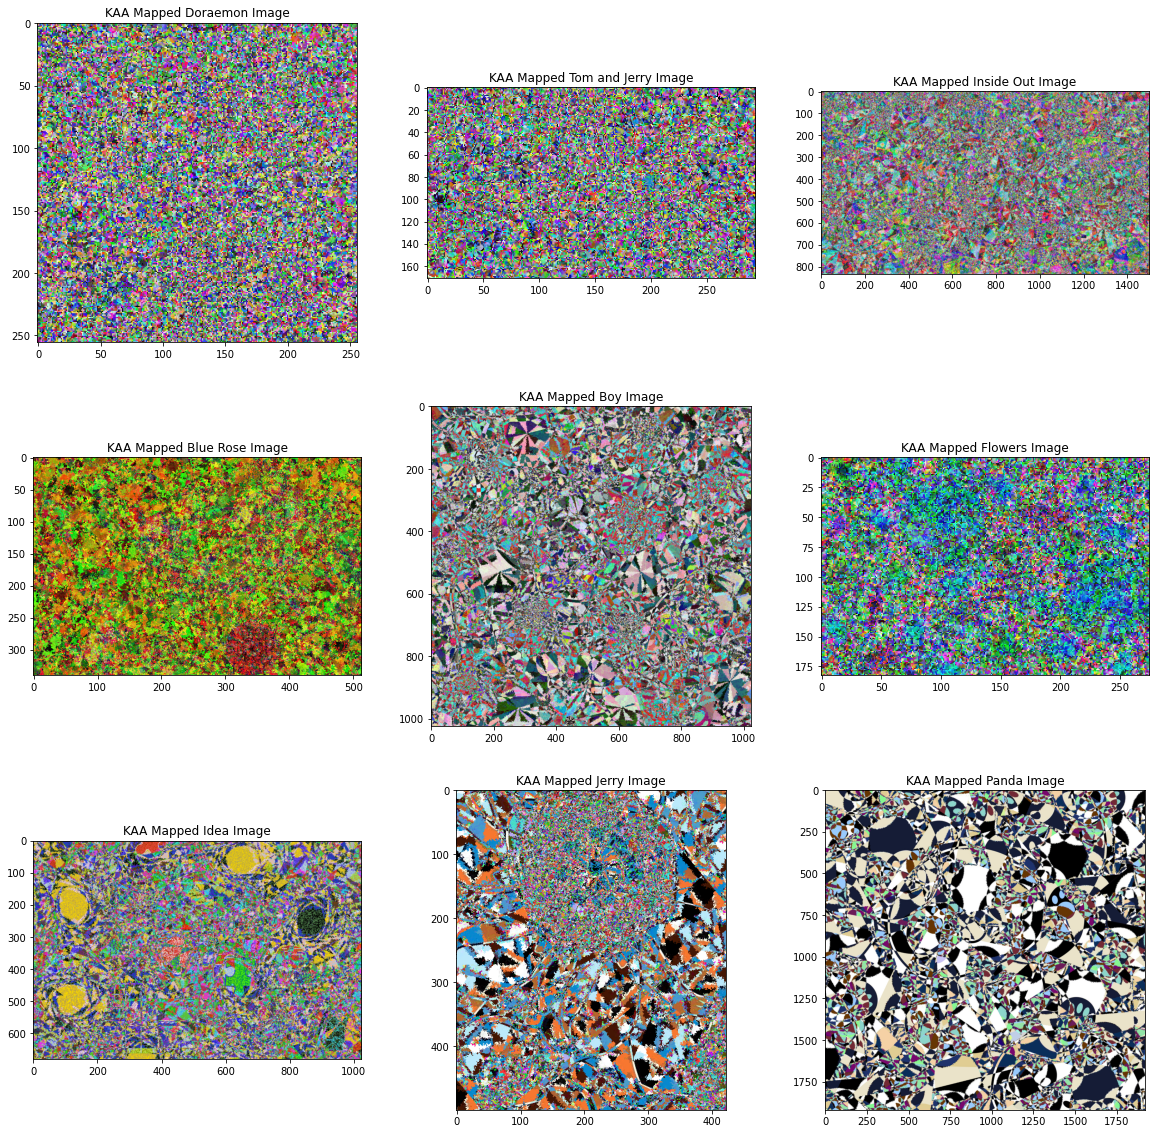

In [16]:
display_images_horizontaly(20, 20, 3, 3, kaa_mapped_images_list, kaa_mapped_images_titles_list)

In [17]:
# Constants for 2D Logistic Adjusted Sine Map
X = 0.3
Y = 0.3
U = 0.9

In [18]:
# Function to get 2D Logistic Adjusted Sine Map
# This is a combination of Logistic Map and Sine Map to add Chaos to the image
# This is used to create the first key for creating confusion in the image 
# x       - The starting value of x for the sequence
# y       - The starting value of y for the sequence
# u       - The control parameter for the sequence
# limit_x - Number of elements required in the x sequence 
# limit_y - Number of elements required in the y sequence
def get_2D_logistic_adjusted_sine_map(x, y, u, limit_x, limit_y):
    def get_next_x(x, y, u):
        return math.sin(math.pi * u * (y + 3) * x * (1 - x))
    def get_next_y(x, y, u):
        return math.sin(math.pi * u * (x + 3) * y * (1 - x))
    result_x = []
    result_y = []
    for i in range(limit_x):
        x = get_next_x(x, y, u)
        result_x.append(x)
    for i in range(limit_y):
        y = get_next_y(x, y, u)
        result_y.append(y)
    return result_x, result_y

In [19]:
# Function to get 2D Logistic Adjusted Sine Map for a particular image
# x     - The starting value of x for the sequence
# y     - The starting value of y for the sequence
# u     - The control parameter for the sequence
# image - The image for which the 2D adjusted logistic sine map sequence is required
def get_2D_logistic_adjusted_sine_map_for_image(x, y, u, image):
    limit_x, limit_y, z = np.shape(image)
    return get_2D_logistic_adjusted_sine_map(x, y, u, limit_x, limit_y)

In [20]:
# The 2D logistic sequences for different images
result_x_doraemon_image,      result_y_doraemon_image      = get_2D_logistic_adjusted_sine_map_for_image(
    X, Y, U, rgb_doraemon_image)
result_x_tom_and_jerry_image, result_y_tom_and_jerry_image = get_2D_logistic_adjusted_sine_map_for_image(
    X, Y, U, rgb_tom_and_jerry_image)
result_x_inside_out_image,    result_y_inside_out_image    = get_2D_logistic_adjusted_sine_map_for_image(
    X, Y, U, rgb_inside_out_image)
result_x_blue_rose_image,     result_y_blue_rose_image     = get_2D_logistic_adjusted_sine_map_for_image(
    X, Y, U, rgb_blue_rose_image)
result_x_boy_image,           result_y_boy_image           = get_2D_logistic_adjusted_sine_map_for_image(
    X, Y, U, rgb_boy_image)
result_x_flowers_image,       result_y_flowers_image       = get_2D_logistic_adjusted_sine_map_for_image(
    X, Y, U, rgb_flowers_image)
result_x_idea_image,          result_y_idea_image          = get_2D_logistic_adjusted_sine_map_for_image(
    X, Y, U, rgb_idea_image)
result_x_jerry_image,         result_y_jerry_image         = get_2D_logistic_adjusted_sine_map_for_image(
    X, Y, U, rgb_jerry_image)
result_x_panda_image,         result_y_panda_image         = get_2D_logistic_adjusted_sine_map_for_image(
    X, Y, U, rgb_panda_image)

### IEEE - 754 double precision convertor

1. Convert given number in binary
2. Represent converted binary number into scientific notation
3. Convert number into IEEE -754 dobule precision 64bit format

1st bit - sign (+ve = 0, -ve = 1)     
Next 11 bits - exponent bias + power  (2<sup>(k - 1)</sup> - 1) + p      
Next 52 bits - mantissa    

In [21]:
# Function to get exponent of a number in scientific notation
# binary_number - Binary number in string format to get the exponent when the number is written in scientific format
def get_exponent_in_scientific_notation(binary_number):
    return len([each for each in binary_number]) - 1

In [22]:
# Function to get exponent bias added with the power
# binary_number - Binary number in string format for which the exponent bias plus power is required
# k             - Number of bits to be considered in the exponent bias plus power, by default this is 11
def get_exponent_bias_plus_power(binary_number, k = 11):
    exponent_bias = 11
    power = get_exponent_in_scientific_notation(binary_number)
    return bin(((2 ** (k - 1)) - 1) + power)[2:]

In [23]:
# Function to convert a binary number to required number of bits
# binary_number - The binary number which needs to be converted to required number of bits
# required_bits - The number of bits to be considered in the binary number
def convert_binary_number_to_required_bits(binary_number, required_bits):
    if len(binary_number) > required_bits:
        return binary_number[:required_bits]
    return '0' * (required_bits - len(binary_number)) + binary_number

In [24]:
# Function to convert a decimal point number into IEE 754 double precision notation
# decimal_point_number - The number in decimal points that need to be converted
def IEEE_754_double_precision_convertor(decimal_point_number):
    sign = '0'
    if decimal_point_number < 0:
        sign = '1'
        decimal_point_number *= -1
    decimal_point_number = '{0:.50f}'.format(decimal_point_number)
    number_before_decimal, number_after_decimal = decimal_point_number.split('.')
    number_before_decimal, number_after_decimal = int(number_before_decimal), int(number_after_decimal)
    binary_number_before_decimal = bin(number_before_decimal)[2:]
    binary_number_after_decimal = bin(number_after_decimal)[2:]
    exponent = get_exponent_bias_plus_power(binary_number_before_decimal)
    mantissa = binary_number_before_decimal[1:] + binary_number_after_decimal
    return sign + convert_binary_number_to_required_bits(exponent, 11) + convert_binary_number_to_required_bits(mantissa, 52)

<strong>The floating point output sequences, x and y,
resulting from the 2D Sine Logistic Map are then
converted to 64–bit by utilizing the IEEE–754 double precision conversion. The control parameter a
is converted to 64–bit in the same manner. Nevertheless, it is shortened, such that only the first
44 bits are employed.</strong>

In [25]:
# Converting the 2D Logistic Adjusted Sine Map sequences of different images in IEEE-754 double precision format
converted_result_x_doraemon_image,      converted_result_y_doraemon_image      = \
[int(IEEE_754_double_precision_convertor(each), 2) for each in result_x_doraemon_image], \
[int(IEEE_754_double_precision_convertor(each), 2) for each in result_y_doraemon_image]
converted_result_x_tom_and_jerry_image, converted_result_y_tom_and_jerry_image = \
[int(IEEE_754_double_precision_convertor(each), 2) for each in result_x_tom_and_jerry_image],\
[int(IEEE_754_double_precision_convertor(each), 2) for each in result_y_tom_and_jerry_image]
converted_result_x_inside_out_image,    converted_result_y_inside_out_image    = \
[int(IEEE_754_double_precision_convertor(each), 2) for each in result_x_inside_out_image], \
[int(IEEE_754_double_precision_convertor(each), 2) for each in result_y_inside_out_image]
converted_result_x_blue_rose_image,     converted_result_y_blue_rose_image     = \
[int(IEEE_754_double_precision_convertor(each), 2) for each in result_x_blue_rose_image], \
[int(IEEE_754_double_precision_convertor(each), 2) for each in result_y_blue_rose_image]
converted_result_x_boy_image,           converted_result_y_boy_image           = \
[int(IEEE_754_double_precision_convertor(each), 2) for each in result_x_boy_image], \
[int(IEEE_754_double_precision_convertor(each), 2) for each in result_y_boy_image]
converted_result_x_flowers_image,       converted_result_y_flowers_image       = \
[int(IEEE_754_double_precision_convertor(each), 2) for each in result_x_flowers_image], \
[int(IEEE_754_double_precision_convertor(each), 2) for each in result_y_flowers_image]
converted_result_x_idea_image,          converted_result_y_idea_image          = \
[int(IEEE_754_double_precision_convertor(each), 2) for each in result_x_idea_image], \
[int(IEEE_754_double_precision_convertor(each), 2) for each in result_y_idea_image]
converted_result_x_jerry_image,         converted_result_y_jerry_image         = \
[int(IEEE_754_double_precision_convertor(each), 2) for each in result_x_jerry_image], \
[int(IEEE_754_double_precision_convertor(each), 2) for each in result_y_jerry_image]
converted_result_x_panda_image,         converted_result_y_panda_image         = \
[int(IEEE_754_double_precision_convertor(each), 2) for each in result_x_panda_image], \
[int(IEEE_754_double_precision_convertor(each), 2) for each in result_y_panda_image]

In [26]:
# Converting the control parameter into the IEEE 754 double precision format
control_a = int(convert_binary_number_to_required_bits(IEEE_754_double_precision_convertor(U), 44), 2)

<strong>Two sequences, L1 and L2, are generated through
the use of the linear congruential generator. These employ the parameters, 
respectively:     
    L1<sub>0</sub> = 3, 538, 644, 446, aL<sub>1</sub> = 27, c = 0, m = 2<sup>52</sup> − 1 and    
    L2<sub>0</sub> = 2, 700, 000, aL<sub>2</sub> = 37, c = 1, m = 2<sup>32</sup> −1.    
    The generated integer sequences L<sub>1</sub> and L<sub>2</sub> are
converted to 52 and 32 bits, respectively.</strong>

In [27]:
# Constants for Linear Congruential Generator
L10, AL1, C1, M1 = 358644446, 27, 0, (2 ** 52) - 1
L20, AL2, C2, M2 = 2700000, 37, 1, (2 ** 32) - 1

In [28]:
# Function to calculate Linear Congruential Sequence
# x     - The starting of the sequence
# a     - The control paramer of the sequence
# c     - The constant of the sequence
# m     - The max limit to confine the output
# limit - The number of elements to be generated in the sequence
def linear_congruential_generator(x, a, c, m, limit):
    def get_next_element(x, a, c, m):
        return (a * x - 1 + c) % m
    result = []
    for i in range(limit):
        result.append(x)
        x = get_next_element(x, a, c, m)
    return result

In [29]:
# Function to get the linear congruential sequence for length and breadth of the image
# x          - The starting of the sequence
# a          - The control paramer of the sequence
# c          - The constant of the sequence
# m          - The max limit to confine the output
# image      - The image for which the linear congruential sequence is required
# is_length  - Whether the sequence is required according to the length of the image
# is_breadth - Whether the sequence is required according to the breadth of the image
def get_linear_congruential_sequence_for_image(x, a, c, m, image, is_length, is_breadth):
    limit_x, limit_y, z = np.shape(image)
    if is_length:
        return linear_congruential_generator(x, a, c, m, limit_x)
    if is_breadth:
        return linear_congruential_generator(x, a, c, m, limit_y)
    return []

In [30]:
# The 2D logistic sequences for different images
result_1_doraemon_image,      result_2_doraemon_image      = \
get_linear_congruential_sequence_for_image(L10, AL1, C1, M1, rgb_doraemon_image, True, False), \
get_linear_congruential_sequence_for_image(L20, AL2, C2, M2, rgb_doraemon_image, False, True)
result_1_tom_and_jerry_image, result_2_tom_and_jerry_image = \
get_linear_congruential_sequence_for_image(L10, AL1, C1, M1, rgb_tom_and_jerry_image, True, False), \
get_linear_congruential_sequence_for_image(L20, AL2, C2, M2, rgb_tom_and_jerry_image, False, True)
result_1_inside_out_image,    result_2_inside_out_image    = \
get_linear_congruential_sequence_for_image(L10, AL1, C1, M1, rgb_inside_out_image, True, False), \
get_linear_congruential_sequence_for_image(L20, AL2, C2, M2, rgb_inside_out_image, False, True)
result_1_blue_rose_image,     result_2_blue_rose_image     = \
get_linear_congruential_sequence_for_image(L10, AL1, C1, M1, rgb_blue_rose_image, True, False), \
get_linear_congruential_sequence_for_image(L20, AL2, C2, M2, rgb_blue_rose_image, False, True)
result_1_boy_image,           result_2_boy_image           = \
get_linear_congruential_sequence_for_image(L10, AL1, C1, M1, rgb_boy_image, True, False), \
get_linear_congruential_sequence_for_image(L20, AL2, C2, M2, rgb_boy_image, False, True)
result_1_flowers_image,       result_2_flowers_image       = \
get_linear_congruential_sequence_for_image(L10, AL1, C1, M1, rgb_flowers_image, True, False), \
get_linear_congruential_sequence_for_image(L20, AL2, C2, M2, rgb_flowers_image, False, True)
result_1_idea_image,          result_2_idea_image          = \
get_linear_congruential_sequence_for_image(L10, AL1, C1, M1, rgb_idea_image, True, False), \
get_linear_congruential_sequence_for_image(L20, AL2, C2, M2, rgb_idea_image, False, True)
result_1_jerry_image,         result_2_jerry_image         = \
get_linear_congruential_sequence_for_image(L10, AL1, C1, M1, rgb_jerry_image, True, False), \
get_linear_congruential_sequence_for_image(L20, AL2, C2, M2, rgb_jerry_image, False, True)
result_1_panda_image,         result_2_panda_image         = \
get_linear_congruential_sequence_for_image(L10, AL1, C1, M1, rgb_panda_image, True, False), \
get_linear_congruential_sequence_for_image(L20, AL2, C2, M2, rgb_panda_image, False, True)

In [31]:
# Converting the Linear Congruential Sequences of different images in IEEE-754 double precision format
converted_result_1_doraemon_image,      converted_result_2_doraemon_image      = \
[int(convert_binary_number_to_required_bits(IEEE_754_double_precision_convertor(each), 52), 2) \
 for each in result_1_doraemon_image], \
[int(convert_binary_number_to_required_bits(IEEE_754_double_precision_convertor(each), 32), 2) \
 for each in result_2_doraemon_image]
converted_result_1_tom_and_jerry_image, converted_result_2_tom_and_jerry_image = \
[int(convert_binary_number_to_required_bits(IEEE_754_double_precision_convertor(each), 52), 2) \
 for each in result_1_tom_and_jerry_image],\
[int(convert_binary_number_to_required_bits(IEEE_754_double_precision_convertor(each), 32), 2) \
 for each in result_2_tom_and_jerry_image]
converted_result_1_inside_out_image,    converted_result_2_inside_out_image    = \
[int(convert_binary_number_to_required_bits(IEEE_754_double_precision_convertor(each), 52), 2) \
 for each in result_1_inside_out_image], \
[int(convert_binary_number_to_required_bits(IEEE_754_double_precision_convertor(each), 32), 2) \
 for each in result_2_inside_out_image]
converted_result_1_blue_rose_image,     converted_result_2_blue_rose_image     = \
[int(convert_binary_number_to_required_bits(IEEE_754_double_precision_convertor(each), 52), 2) \
 for each in result_1_blue_rose_image], \
[int(convert_binary_number_to_required_bits(IEEE_754_double_precision_convertor(each), 32), 2) \
 for each in result_2_blue_rose_image]
converted_result_1_boy_image,           converted_result_2_boy_image           = \
[int(convert_binary_number_to_required_bits(IEEE_754_double_precision_convertor(each), 52), 2) \
 for each in result_1_boy_image], \
[int(convert_binary_number_to_required_bits(IEEE_754_double_precision_convertor(each), 32), 2) \
 for each in result_2_boy_image]
converted_result_1_flowers_image,       converted_result_2_flowers_image       = \
[int(convert_binary_number_to_required_bits(IEEE_754_double_precision_convertor(each), 52), 2) \
 for each in result_1_flowers_image], \
[int(convert_binary_number_to_required_bits(IEEE_754_double_precision_convertor(each), 32), 2) \
 for each in result_2_flowers_image]
converted_result_1_idea_image,          converted_result_2_idea_image          = \
[int(convert_binary_number_to_required_bits(IEEE_754_double_precision_convertor(each), 52), 2) \
 for each in result_1_idea_image], \
[int(convert_binary_number_to_required_bits(IEEE_754_double_precision_convertor(each), 32), 2) \
 for each in result_2_idea_image]
converted_result_1_jerry_image,         converted_result_2_jerry_image         = \
[int(convert_binary_number_to_required_bits(IEEE_754_double_precision_convertor(each), 52), 2) \
 for each in result_1_jerry_image], \
[int(convert_binary_number_to_required_bits(IEEE_754_double_precision_convertor(each), 32), 2) \
 for each in result_2_jerry_image]
converted_result_1_panda_image,         converted_result_2_panda_image         = \
[int(convert_binary_number_to_required_bits(IEEE_754_double_precision_convertor(each), 52), 2) \
 for each in result_1_panda_image], \
[int(convert_binary_number_to_required_bits(IEEE_754_double_precision_convertor(each), 32), 2) \
 for each in result_2_panda_image]

In [32]:
# Function to generate first key to create confusion for a particular image
# image    - Image for which the first key has to be generated
# result_x - first result obtained from 2D Logisctic Adjusted Sine Map
# result_y - second result obtained from 2D Logistic Adjusted Sine Map
# result_1 - first result obtained from Linear Congruential Generator
# result_2 - second result obtained from Linear Congruential Generator
def generate_key1_for_an_image(image, result_x, result_y, control_a, result_1, result_2):
    limit_x, limit_y, z = np.shape(image)
    return [[(result_x[i] + result_y[j] + control_a + result_1[i] + result_2[j]) % 256 \
             for j in range(limit_y)] for i in range(limit_x)]

In [33]:
# Getting the first keys for different images
key1_doraemon_image      = generate_key1_for_an_image(rgb_doraemon_image, 
                                                 converted_result_x_doraemon_image, 
                                                 converted_result_y_doraemon_image, 
                                                 control_a, 
                                                 converted_result_1_doraemon_image, 
                                                 converted_result_2_doraemon_image)
key1_tom_and_jerry_image = generate_key1_for_an_image(rgb_tom_and_jerry_image, 
                                                 converted_result_x_tom_and_jerry_image, 
                                                 converted_result_y_tom_and_jerry_image, 
                                                 control_a, 
                                                 converted_result_1_tom_and_jerry_image, 
                                                 converted_result_2_tom_and_jerry_image)
key1_inside_out_image   = generate_key1_for_an_image(rgb_inside_out_image, 
                                                 converted_result_x_inside_out_image, 
                                                 converted_result_y_inside_out_image, 
                                                 control_a, 
                                                 converted_result_1_inside_out_image, 
                                                 converted_result_2_inside_out_image)
key1_blue_rose_image    = generate_key1_for_an_image(rgb_blue_rose_image, 
                                                 converted_result_x_blue_rose_image, 
                                                 converted_result_y_blue_rose_image, 
                                                 control_a, 
                                                 converted_result_1_blue_rose_image, 
                                                 converted_result_2_blue_rose_image)
key1_boy_image = generate_key1_for_an_image(rgb_boy_image, 
                                                 converted_result_x_boy_image, 
                                                 converted_result_y_boy_image, 
                                                 control_a, 
                                                 converted_result_1_boy_image, 
                                                 converted_result_2_boy_image)
key1_flowers_image = generate_key1_for_an_image(rgb_flowers_image, 
                                                 converted_result_x_flowers_image, 
                                                 converted_result_y_flowers_image, 
                                                 control_a, 
                                                 converted_result_1_flowers_image, 
                                                 converted_result_2_flowers_image)
key1_idea_image = generate_key1_for_an_image(rgb_idea_image, 
                                                 converted_result_x_idea_image, 
                                                 converted_result_y_idea_image, 
                                                 control_a, 
                                                 converted_result_1_idea_image, 
                                                 converted_result_2_idea_image)
key1_jerry_image = generate_key1_for_an_image(rgb_jerry_image, 
                                                 converted_result_x_jerry_image, 
                                                 converted_result_y_jerry_image, 
                                                 control_a, 
                                                 converted_result_1_jerry_image, 
                                                 converted_result_2_jerry_image)
key1_panda_image = generate_key1_for_an_image(rgb_panda_image, 
                                                 converted_result_x_panda_image, 
                                                 converted_result_y_panda_image, 
                                                 control_a, 
                                                 converted_result_1_panda_image, 
                                                 converted_result_2_panda_image)

In [34]:
# Function to get key masked image
# image - Image to which the key encryption has to be applied
# key   - Key for encryption
def get_key_encrypted_image(image, key):
    limit_x, limit_y, z = np.shape(image)
    blue, green, red = cv2.split(np.array(image))
    for i in range(limit_x):
        for j in range(limit_y):
            red[i][j]   ^= key[i][j]
            blue[i][j]  ^= key[i][j]
            green[i][j] ^= key[i][j]
    return cv2.merge([red, green, blue])

In [35]:
# Key 1 Encrypted images
key1_encrypted_doraemon_image      = get_key_encrypted_image(kaa_mapped_doraemon_image, key1_doraemon_image)
key1_encrypted_tom_and_jerry_image = get_key_encrypted_image(kaa_mapped_tom_and_jerry_image, key1_tom_and_jerry_image)
key1_encrypted_inside_out_image    = get_key_encrypted_image(kaa_mapped_inside_out_image, key1_inside_out_image)
key1_encrypted_blue_rose_image     = get_key_encrypted_image(kaa_mapped_blue_rose_image, key1_blue_rose_image)
key1_encrypted_boy_image           = get_key_encrypted_image(kaa_mapped_boy_image, key1_boy_image)
key1_encrypted_flowers_image       = get_key_encrypted_image(kaa_mapped_flowers_image, key1_flowers_image)
key1_encrypted_idea_image          = get_key_encrypted_image(kaa_mapped_idea_image, key1_idea_image)
key1_encrypted_jerry_image         = get_key_encrypted_image(kaa_mapped_jerry_image, key1_jerry_image)
key1_encrypted_panda_image         = get_key_encrypted_image(kaa_mapped_panda_image, key1_panda_image)

In [36]:
key1_encrypted_images_list        = [key1_encrypted_doraemon_image, key1_encrypted_tom_and_jerry_image, 
                                     key1_encrypted_inside_out_image, key1_encrypted_blue_rose_image, 
                                     key1_encrypted_boy_image, key1_encrypted_flowers_image,
                                     key1_encrypted_idea_image, key1_encrypted_jerry_image, key1_encrypted_panda_image]
key1_encrypted_images_titles_list = ["Key1 Encrypted Doraemon Image", "Key1 Encrypted Tom and Jerry Image", 
                                     "Key1 Encrypted Inside Out Image", "Key1 Encrypted Blue Rose Image", 
                                     "Key1 Encrypted Boy Image", "Key1 Encrypted Flowers Image",
                                     "Key1 Encrypted Idea Image", "Key1 Encrypted Jerry Image", "Key1 Encrypted Panda Image"]

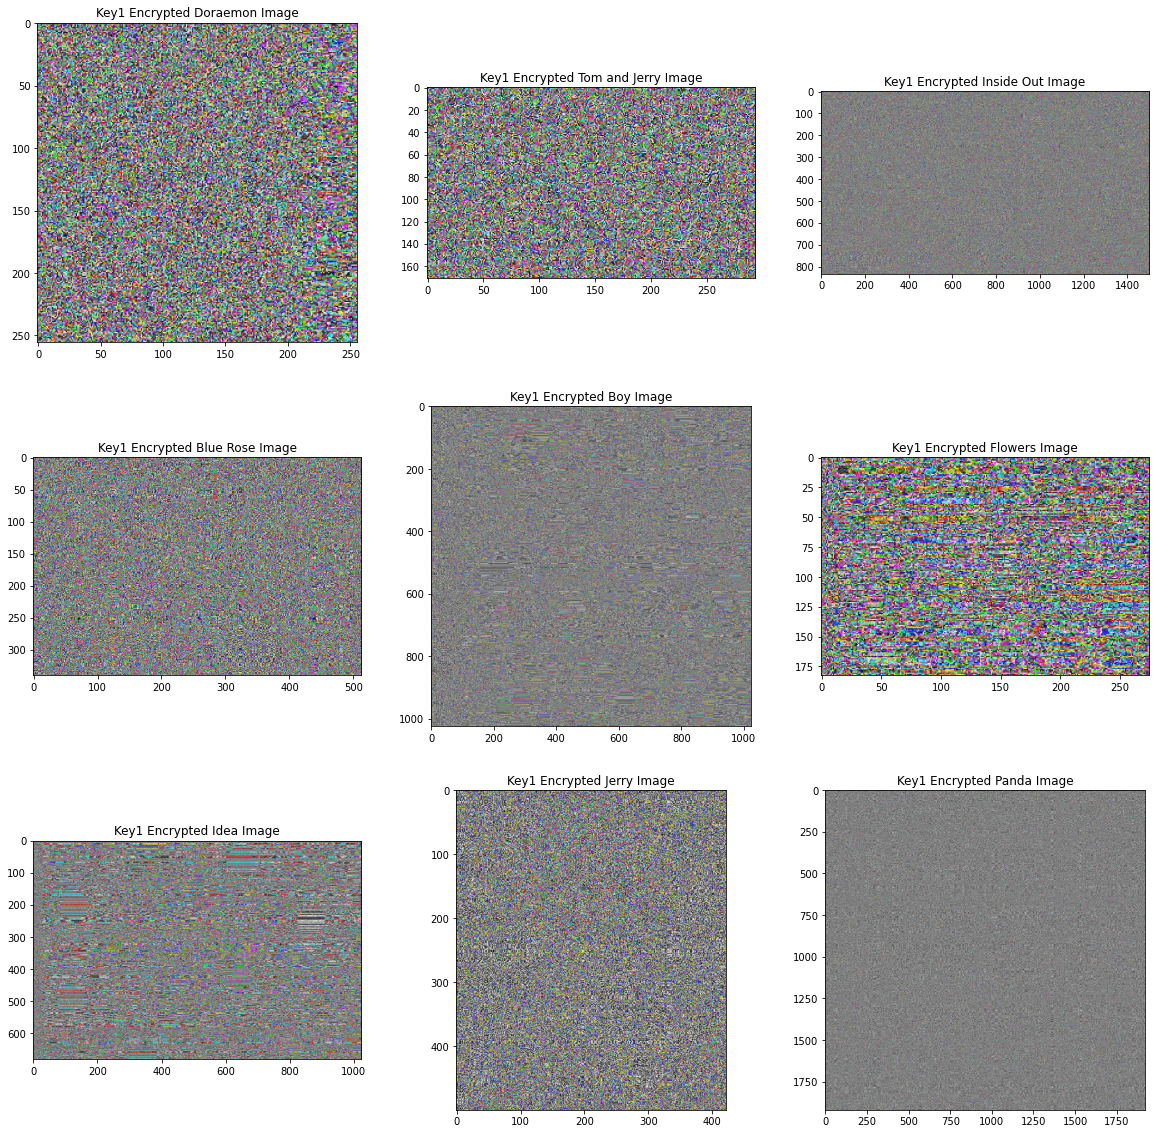

In [37]:
display_images_horizontaly(20, 20, 3, 3, key1_encrypted_images_list, key1_encrypted_images_titles_list)

In [38]:
# Tent Map Sequence Constants
X_TENT_MAP = 0.5
C_TENT_MAP = 1.5

In [39]:
# Function to get Tent Map sequence for generation of second key
# x     - The begining of tent map sequence
# c     - The control parameter
# limit - The number of elements required in the sequence
def get_tent_map(x, c, limit):
    def get_next_element(x, c):
        if 0 <= x <= 0.5:
            return c * x
        if 0.5 <= x <= 1:
            return c * (1 - x)
        return x
    result = []
    for i in range(limit):
        result.append(x)
        x = get_next_element(x, c)
    return result

In [40]:
# Function to get Tent Map Sequence for a given Image
def get_tent_map_sequence_for_an_image(image, x, c):
    limit_x, limit_y, z = np.shape(image)
    return get_tent_map(x, c, limit_x)

In [41]:
# Tent map sequences for the different images
tent_map_result_doraemon_image      = get_tent_map_sequence_for_an_image(rgb_doraemon_image, X_TENT_MAP, C_TENT_MAP)
tent_map_result_tom_and_jerry_image = get_tent_map_sequence_for_an_image(rgb_tom_and_jerry_image, X_TENT_MAP, C_TENT_MAP)
tent_map_result_inside_out_image    = get_tent_map_sequence_for_an_image(rgb_inside_out_image, X_TENT_MAP, C_TENT_MAP)
tent_map_result_blue_rose_image     = get_tent_map_sequence_for_an_image(rgb_blue_rose_image, X_TENT_MAP, C_TENT_MAP)
tent_map_result_boy_image           = get_tent_map_sequence_for_an_image(rgb_boy_image, X_TENT_MAP, C_TENT_MAP)
tent_map_result_flowers_image       = get_tent_map_sequence_for_an_image(rgb_flowers_image, X_TENT_MAP, C_TENT_MAP)
tent_map_result_idea_image          = get_tent_map_sequence_for_an_image(rgb_idea_image, X_TENT_MAP, C_TENT_MAP)
tent_map_result_jerry_image         = get_tent_map_sequence_for_an_image(rgb_jerry_image, X_TENT_MAP, C_TENT_MAP)
tent_map_result_panda_image         = get_tent_map_sequence_for_an_image(rgb_panda_image, X_TENT_MAP, C_TENT_MAP)

In [50]:
# IEEE 754 double precision converted tent map sequences for images
converted_tent_map_result_doraemon_image      = [int(convert_binary_number_to_required_bits(
    IEEE_754_double_precision_convertor(each), 327), 2) for each in tent_map_result_doraemon_image]
converted_tent_map_result_tom_and_jerry_image = [int(convert_binary_number_to_required_bits(
    IEEE_754_double_precision_convertor(each), 327), 2) for each in tent_map_result_tom_and_jerry_image]
converted_tent_map_result_inside_out_image    = [int(convert_binary_number_to_required_bits(
    IEEE_754_double_precision_convertor(each), 327), 2) for each in tent_map_result_inside_out_image]
converted_tent_map_result_blue_rose_image     = [int(convert_binary_number_to_required_bits(
    IEEE_754_double_precision_convertor(each), 327), 2) for each in tent_map_result_blue_rose_image ]
converted_tent_map_result_boy_image           = [int(convert_binary_number_to_required_bits(
    IEEE_754_double_precision_convertor(each), 327), 2) for each in tent_map_result_boy_image]
converted_tent_map_result_flowers_image       = [int(convert_binary_number_to_required_bits(
    IEEE_754_double_precision_convertor(each), 327), 2) for each in tent_map_result_flowers_image]
converted_tent_map_result_idea_image          = [int(convert_binary_number_to_required_bits(
    IEEE_754_double_precision_convertor(each), 327), 2) for each in tent_map_result_idea_image]
converted_tent_map_result_jerry_image         = [int(convert_binary_number_to_required_bits(
    IEEE_754_double_precision_convertor(each), 327), 2) for each in tent_map_result_jerry_image]
converted_tent_map_result_panda_image         = [int(convert_binary_number_to_required_bits(
    IEEE_754_double_precision_convertor(each), 327), 2) for each in tent_map_result_panda_image]

In [42]:
# Bernouilli Map Constants
X_BERNOULLI_MAP = (0.25 * 1.75) - 0.5
A_BERNOULLI_MAP = 0.5
B_BERNOULLI_MAP = 1.75

In [43]:
# Function to get the bernoulli map sequence for the given image
# x     - The begining of the sequence for the bernoulli map
# a     - The control parameter for the sequence
# b     - The constant parameter for the sequence
# limit - The number of elements to be generated for the sequence
def get_bernoulli_map(x, a, b, limit):
    def get_next_element(x, a, b):
        if -a <= x <= 0:
            return (b * x) - a
        elif 0 <= x <= a:
            return (b * x) + a
        return 0
    result = []
    for i in range(limit):
        result.append(x)
        x = get_next_element(x, a, b)
    return result

In [44]:
def get_bernoulli_map_sequence_for_an_image(image, x, a, b):
    limit_x, limit_y, z = np.shape(image)
    return get_bernoulli_map(x, a, b, limit_y)

In [45]:
# Bernoulli map sequences for the different images
bernoulli_map_result_doraemon_image      = get_bernoulli_map_sequence_for_an_image(
    rgb_doraemon_image, X_BERNOULLI_MAP, A_BERNOULLI_MAP, B_BERNOULLI_MAP)
bernoulli_map_result_tom_and_jerry_image = get_bernoulli_map_sequence_for_an_image(
    rgb_tom_and_jerry_image, X_BERNOULLI_MAP, A_BERNOULLI_MAP, B_BERNOULLI_MAP)
bernoulli_map_result_inside_out_image    = get_bernoulli_map_sequence_for_an_image(
    rgb_inside_out_image, X_BERNOULLI_MAP, A_BERNOULLI_MAP, B_BERNOULLI_MAP)
bernoulli_map_result_blue_rose_image     = get_bernoulli_map_sequence_for_an_image(
    rgb_blue_rose_image, X_BERNOULLI_MAP, A_BERNOULLI_MAP, B_BERNOULLI_MAP)
bernoulli_map_result_boy_image           = get_bernoulli_map_sequence_for_an_image(
    rgb_boy_image, X_BERNOULLI_MAP, A_BERNOULLI_MAP, B_BERNOULLI_MAP)
bernoulli_map_result_flowers_image       = get_bernoulli_map_sequence_for_an_image(
    rgb_flowers_image, X_BERNOULLI_MAP, A_BERNOULLI_MAP, B_BERNOULLI_MAP)
bernoulli_map_result_idea_image          = get_bernoulli_map_sequence_for_an_image(
    rgb_idea_image, X_BERNOULLI_MAP, A_BERNOULLI_MAP, B_BERNOULLI_MAP)
bernoulli_map_result_jerry_image         = get_bernoulli_map_sequence_for_an_image(
    rgb_jerry_image, X_BERNOULLI_MAP, A_BERNOULLI_MAP, B_BERNOULLI_MAP)
bernoulli_map_result_panda_image         = get_bernoulli_map_sequence_for_an_image(
    rgb_panda_image, X_BERNOULLI_MAP, A_BERNOULLI_MAP, B_BERNOULLI_MAP)

In [46]:
# Function to generate second encryption key from tent map and bernoulli map sequences
# tent_map_result      - Sequence generated using the tent map equation
# bernoulli_map_result - Sequence generated using the bernoulli map equation
# image                - The image for which the key is required
def generate_key2_for_an_image(tent_map_result, bernoulli_map_result, image):
    limit_x, limit_y, x = np.shape(image)
    return [[int(tent_map_result[i] + bernoulli_map_result[j]) % 256 for j in range(limit_y)] for i in range(limit_x)]

In [47]:
# Second keys for creating another level of confusion in the images
key2_doraemon_image      = generate_key2_for_an_image(tent_map_result_doraemon_image, 
                                                  bernoulli_map_result_doraemon_image, 
                                                  rgb_doraemon_image)
key2_tom_and_jerry_image = generate_key2_for_an_image(tent_map_result_tom_and_jerry_image, 
                                                  bernoulli_map_result_tom_and_jerry_image, 
                                                  rgb_tom_and_jerry_image)
key2_inside_out_image    = generate_key2_for_an_image(tent_map_result_inside_out_image, 
                                                  bernoulli_map_result_inside_out_image, 
                                                  rgb_inside_out_image)
key2_blue_rose_image     = generate_key2_for_an_image(tent_map_result_blue_rose_image, 
                                                  bernoulli_map_result_blue_rose_image, 
                                                  rgb_blue_rose_image)
key2_boy_image           = generate_key2_for_an_image(tent_map_result_boy_image, 
                                                  bernoulli_map_result_boy_image, 
                                                  rgb_boy_image)
key2_flowers_image       = generate_key2_for_an_image(tent_map_result_flowers_image, 
                                                  bernoulli_map_result_flowers_image, 
                                                  rgb_flowers_image)
key2_idea_image          = generate_key2_for_an_image(tent_map_result_idea_image, 
                                                  bernoulli_map_result_idea_image, 
                                                  rgb_idea_image)
key2_jerry_image         = generate_key2_for_an_image(tent_map_result_jerry_image, 
                                                  bernoulli_map_result_jerry_image, 
                                                  rgb_jerry_image)
key2_panda_image         = generate_key2_for_an_image(tent_map_result_panda_image, 
                                                  bernoulli_map_result_panda_image, 
                                                  rgb_panda_image)

In [48]:
# Key 2 Encrypted images
key2_encrypted_doraemon_image      = get_key_encrypted_image(key1_encrypted_doraemon_image, key2_doraemon_image)
key2_encrypted_tom_and_jerry_image = get_key_encrypted_image(key1_encrypted_tom_and_jerry_image, key2_tom_and_jerry_image)
key2_encrypted_inside_out_image    = get_key_encrypted_image(key1_encrypted_inside_out_image, key2_inside_out_image)
key2_encrypted_blue_rose_image     = get_key_encrypted_image(key1_encrypted_blue_rose_image, key2_blue_rose_image)
key2_encrypted_boy_image           = get_key_encrypted_image(key1_encrypted_boy_image, key2_boy_image)
key2_encrypted_flowers_image       = get_key_encrypted_image(key1_encrypted_flowers_image, key2_flowers_image)
key2_encrypted_idea_image          = get_key_encrypted_image(key1_encrypted_idea_image, key2_idea_image)
key2_encrypted_jerry_image         = get_key_encrypted_image(key1_encrypted_jerry_image, key2_jerry_image)
key2_encrypted_panda_image         = get_key_encrypted_image(key1_encrypted_panda_image, key2_panda_image)

In [77]:
limit = 256
r_1 = get_bernoulli_map((0.25 * 1.75) - 0.5, 0.5, 1.75, limit)
r_2 = get_tent_map(0.5, 1.5, limit)

In [80]:
r_1 = [int(IEEE_754_double_precision_convertor(each), 2) for each in r_1]
r_2 = [int(IEEE_754_double_precision_convertor(each), 2) for each in r_2]

In [83]:
key2 = []
for i in range(256):
    key = []
    for j in range(256):
        key.append((r_1[i] + r_2[i]) % 256)
    key2.append(key)

In [84]:
for i in range(x):
    for j in range(y):
        red[i][j] = red[i][j] ^ key2[i][j]
        blue[i][j] = blue[i][j] ^ key2[i][j]
        green[i][j] = green[i][j] ^ key2[i][j]

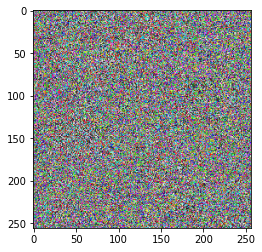

In [133]:
rgb_img = cv2.merge([red, green, blue])
plt.imshow(rgb_img)

In [124]:
_bins = 256
hist, _ = np.histogram(red.ravel(), bins=_bins, range=(0, _bins))
prob_dist = hist / hist.sum()
red_entropy = entropy(prob_dist, base=2)

In [125]:
_bins = 256
hist, _ = np.histogram(blue.ravel(), bins=_bins, range=(0, _bins))
prob_dist = hist / hist.sum()
blue_entropy = entropy(prob_dist, base=2)

In [126]:
_bins = 256
hist, _ = np.histogram(green.ravel(), bins=_bins, range=(0, _bins))
prob_dist = hist / hist.sum()
green_entropy = entropy(prob_dist, base=2)

In [128]:
_bins = 256
hist, _ = np.histogram(rgb_img.ravel(), bins=_bins, range=(0, _bins))
prob_dist = hist / hist.sum()
image_entropy = entropy(prob_dist, base=2)

In [129]:
print(red_entropy, blue_entropy, green_entropy, image_entropy)

7.997470599973883 7.997395961610535 7.9968096158061694 7.999066628722054


In [131]:
image_path = '../Pictures/doraemon.webp'
image = cv2.imread(image_path)
h = np.array(image)
b, g, r = cv2.split(h)
img = cv2.merge([r, g, b])

In [134]:
err = np.sum((rgb_img.astype("float") - img.astype("float")) ** 2)
err /= float(rgb_img.shape[0] * img.shape[1])

In [140]:
print(err)

32511.180068969727


In [141]:
psnr = cv2.PSNR(rgb_img, img)

In [81]:
float(

1656089388.27767

In [83]:
string = "165608938827767e-05"
string = string.split('e')[1]

In [84]:
string

'-05'

In [85]:
int(string)

-5

In [86]:
10 ** -5

1e-05

In [87]:
float(10 ** -5)

1e-05

In [88]:
float(1e-05)

1e-05

In [90]:
d = (float) 1e-05

SyntaxError: invalid syntax (1682534207.py, line 1)

In [100]:
'{0:.100f}'.format(6.165608938827767e-05)

'0.0000616560893882776709425813654874559688323643058538436889648437500000000000000000000000000000000000'

In [96]:
'%f' % (6.165608938827767e-05)

'0.000062'